<a href="https://colab.research.google.com/github/jiyay27/colab-works-maclrn/blob/main/02_Decision_Trees_donato_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**<span style="color:#448844">Note</span>** This notebook is meant to be interactive. Launch this notebook in Jupyter to see its full potential.


Name: John Joseph Donato

Section: S12

# Decision Trees Exercise
This exercise will guide you in implementing the Decision Trees.


## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs.
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Fix the seed of the random number
# generator so that your results will match ours
np.random.seed(1)

# %load_ext autoreload
# %autoreload 2

# Decision Trees - Classification

For this first section, we will create a decision tree to predict the flower species from the iris dataset.

**Dataset:**
The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class (Species):
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

In [9]:
import pandas as pd

# loads csv file into a pandas dataframe
iris = pd.read_csv('/iris.csv')

iris["species"] = pd.Categorical(iris["species"]).codes
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# TODO : Extract the feature columns for X, and the label column for y
# Hint : For X, look up pandas.drop()
#      : You can convert a DataFrame to a matrix using your_dataframe.as_matrix()
### START CODE HERE ###
X = iris.drop('species', axis=1)
y = iris['species']
### END CODE HERE ###

print(X.shape)
print(y.shape)

(150, 4)
(150,)


**Sanity Check:**
```
X: (150, 4)
y: (150,)
```

In [18]:
# TODO : Split the dataset into train and test sets
### START CODE HERE ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27, stratify=y
)
### END CODE HERE ###

## Building our classification tree
We will be using sklearn's `DecisionTreeClassifier`

In [21]:
# TODO : Build our classification tree, do not draw any conclusions in this cell yet
### START CODE HERE ###
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=27)
dtc.fit(X_train, y_train)
### END CODE HERE ###

DecisionTreeClassifier(random_state=27)

From our lecture, we learned that trees can overfit by creating a separate node for every single configuration of feature values possible. Let's see if this is true by running predictions on our training set.

In [28]:
# TODO : Run predictions on the train set, get the accuracy
### START CODE HERE ###
from sklearn.metrics import classification_report, accuracy_score

predictions_train = dtc.predict(X_train)
print(classification_report(y_train, predictions_train))
print("Accuracy:", accuracy_score(y_train, predictions_train))
### END CODE HERE ###

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 1.0


**Sanity Check:** A decision tree without regularization should be able to achieve 100% accuracy on the training set.

If not, you might be seeing a 99.9999% accuracy. But if you look at the predictions, you will see that it got the test set predicted

Let's see how our model does with the test set.

In [29]:
# TODO : Run predictions on the test set, get the accuracy
### START CODE HERE ###
predictions = dtc.predict(X_test)
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
### END CODE HERE ###

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

Accuracy: 0.9


Check out the following tree attributes to understand more of how the tree looks like

In [30]:
dtc.tree_.node_count

13

In [31]:
dtc.tree_.children_left

array([ 1, -1,  3,  4, -1,  6, -1, -1,  9, 10, -1, -1, -1], dtype=int64)

In [32]:
dtc.tree_.feature

array([ 2, -2,  3,  2, -2,  1, -2, -2,  2,  0, -2, -2, -2], dtype=int64)

In [33]:
dtc.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  5.04999995, -2.        ,
        2.75      , -2.        , -2.        ,  4.85000014,  5.95000005,
       -2.        , -2.        , -2.        ])

### Visualize the tree

In [37]:
from sklearn import tree

tree.export_graphviz(dtc,out_file='/tree.dot')

To view a graph of the tree, open `tree.dot` and paste its contents in <a src="http://webgraphviz.com/">webgraphviz.com</a>. You'll end up with a similar tree like the one below:

<img src="https://i.imgur.com/E7UJJZk.png" width="300px">

_______

# Decision Trees - Regression

For regression, we will generate a dummy dataset following a sin curve so we can visualize the results.


## Generating our dataset

In [41]:
n_samples = 300
np.random.seed(1)
X = np.expand_dims(np.random.uniform(-np.pi,np.pi, n_samples),1)
y = np.sin(2*X) + np.random.randn(n_samples,1)*0.3

num_items = X.shape[0]
randIdx = np.arange(num_items)

In [43]:
# TODO: Split the data set, set random seed to 42 so your results matches the sanity check below
### START CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
### END CODE HERE ###

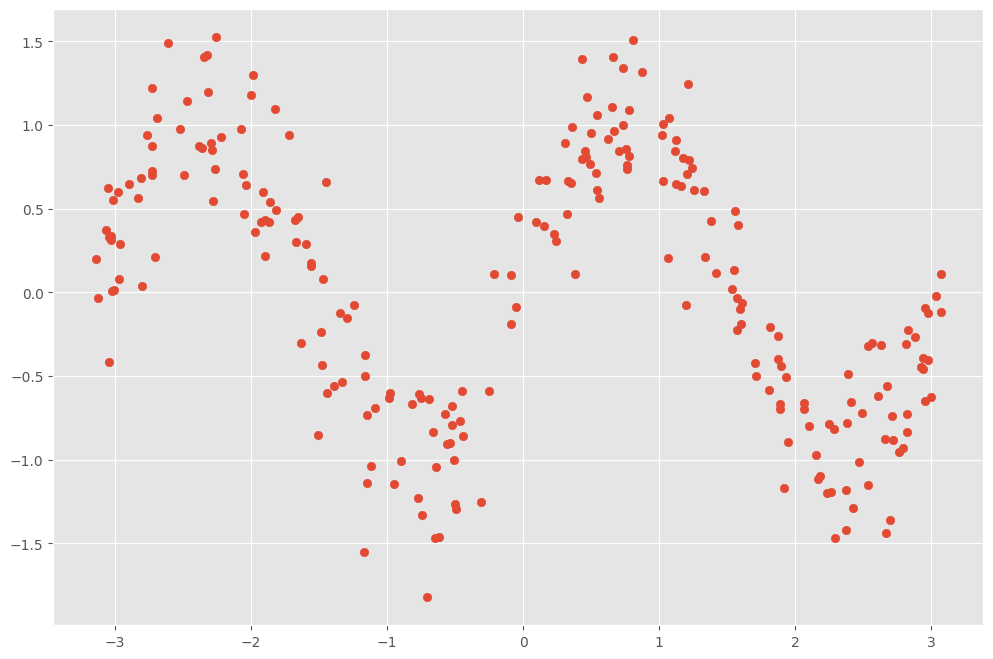

In [44]:
# View the data set
%matplotlib inline
plt.scatter(X_train,y_train)

## Building our regression tree
Here we will use `DecisionTreeRegressor`

In [53]:
# TODO : Build our classifier, and predict the y-values of the test data
### START CODE HERE ###
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

predictions = dtr.predict(X_test)
### END CODE HERE ###

In [54]:
# TODO : Calculate for the mean squared error, and the absolute error
### START CODE HERE ###
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error :", mse)

are = mean_absolute_error(y_test, predictions)
print("Absolute Error :", are)
### END CODE HERE ###

Mean Squared Error : 0.22079834496085063
Absolute Error : 0.3855210192908825


**Sanity Check:**
```
Mean Squared Error : 0.260963821953
Absolute Error : 0.414856812765
```

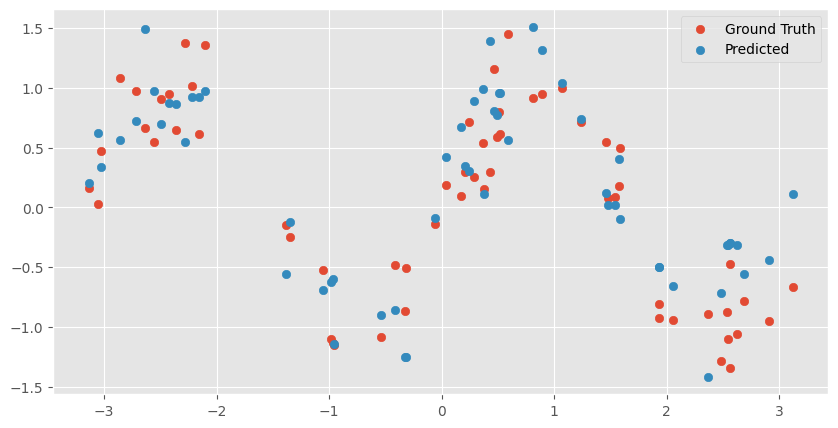

In [55]:
# Visualize how the our predictions fare against the actual results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, label='Ground Truth')
plt.scatter(X_test, predictions, label='Predicted')
plt.legend(loc='upper right')

### Regularizing Decision Trees
In the absence of regularization, the decision tree will memorize the training set and achieve 0% error. While this is good in terms of bias, it may not generalize well to never before seen data (variance problem)

Modify your model to include three ways of regularization:
- **Minimum samples split**: If the remaining samples are less than the specifed value then we stop splitting and make it a leaf node
- **Max depth**: Restricts the maximum depth of the trees
- **Minimum impurity gain**: If the impurity gain is less than the specified value then we stop splitting and make it a leaf node.

**Minimum samples split**

Apply different minimum samples splits to your model.

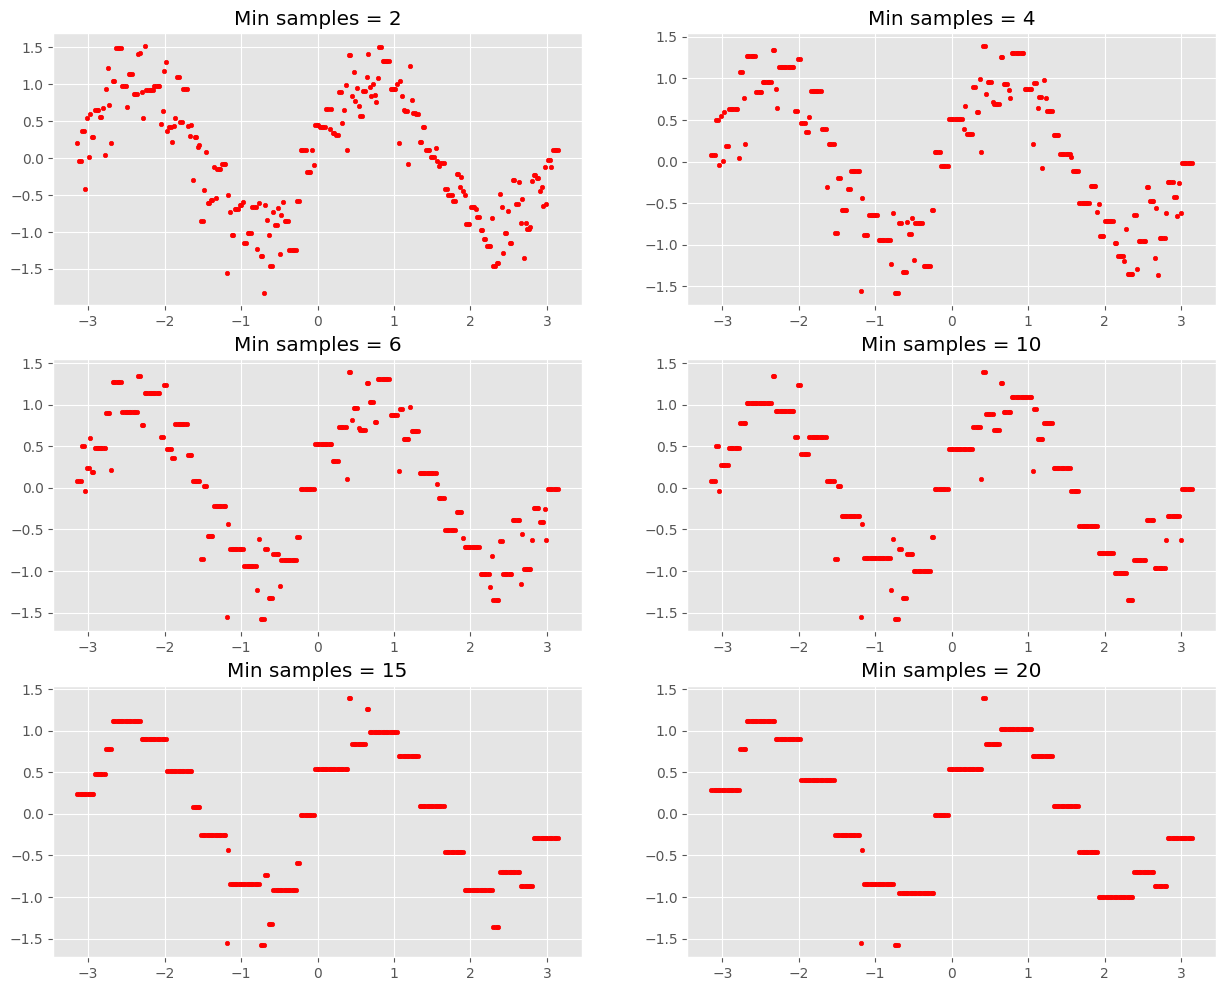

In [58]:
# You will use this test set for the visualization below, so use this as your test set for the loop below
# You will see that it follows the same sin function as our training data
X_test_vis = np.expand_dims(np.linspace(-np.pi,np.pi,300),-1)

# Some plotting stuff
plt_ctr = 1
plt.figure(figsize=(15,12))

# Try it over these values
min_samples_split_vals = [2, 4, 6, 10, 15, 20]

for val in min_samples_split_vals:
    # TODO : Train a decision tree with the indicated minimum samples split val in this loop
    ### START CODE HERE ###
    dtr = DecisionTreeRegressor(min_samples_split=val, random_state=42)
    dtr.fit(X_train, y_train)
    ### END CODE HERE ###

    plt.subplot(3,2,plt_ctr)

    # TODO : Predict the values of the test set we created for visualization
    #        Then, make a scatter plot with your predictions as the y-coordinate
    ### START CODE HERE ###
    predictions = dtr.predict(X_test_vis)
    plt.scatter(X_test_vis, predictions, s=10, color="red", label="Predictions")
    ### END CODE HERE ###

    plt.title("Min samples = "+ str(val))

    plt_ctr += 1

**Sanity Check:**
Your graph should like the one below:
<img src="https://imgur.com/Wibqyx4.png" width="400px">

<br>


Question: As we increase the number of minimum samples, the predictions for close/nearby x values tend to get the same y-value. Why?

A: With higher `min_samples_split`, the tree makes fewer splits, so nearby x values fall into the same region and get the same  y-value.

**Maximum depth**

Apply different maximum depths to your model.

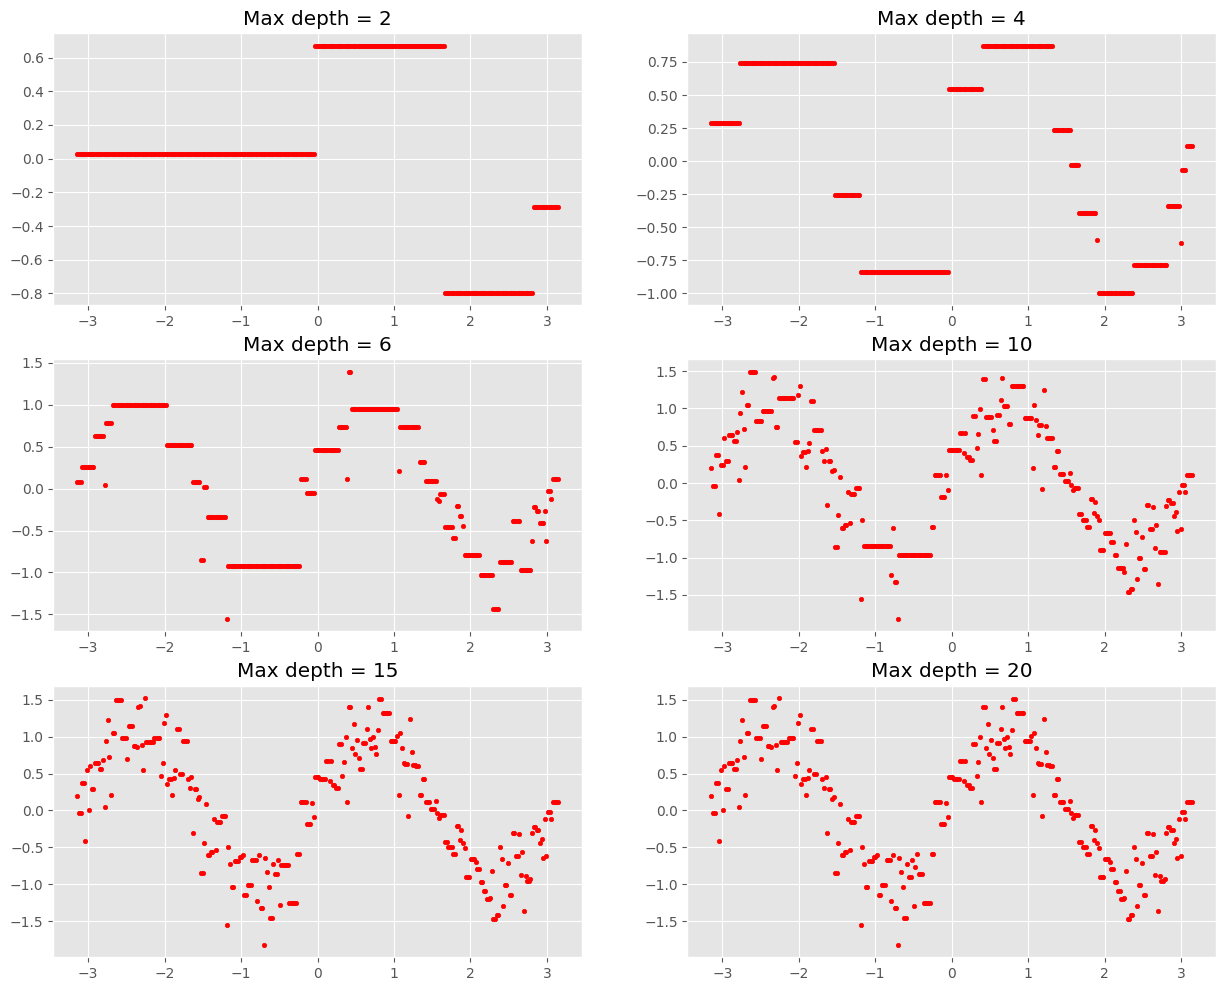

In [60]:
max_depth_vals = [2, 4, 6, 10, 15, 20]
plt_ctr = 1
plt.figure(figsize=(15,12))
for val in max_depth_vals:
    # TODO : Train a decision tree with the indicated max depth val in this loop
    ### START CODE HERE ###
    dtr = DecisionTreeRegressor(max_depth=val, random_state=42)
    dtr.fit(X_train, y_train)
    ### END CODE HERE ###

    plt.subplot(3,2,plt_ctr)

    # TODO : Predict the values of the test set we created for visualization
    #        Then, make a scatter plot with your predictions as the y-coordinate
    ### START CODE HERE ###
    predictions = dtr.predict(X_test_vis)
    plt.scatter(X_test_vis, predictions, s=10, c="red")   # model predictions
    ### END CODE HERE ###

    plt.title("Max depth = "+ str(val))

    plt_ctr += 1

**Sanity Check:** The higher the max depth, the more unique labels you will get. (Inverse of minimum spits)

**Question:** As we increase the maximum depth, the predictions for close/nearby x values tend to get the different y-values. Why?

A: It overfits the noise in the data, so nearby `x` values can end up in different leaves with different `y` predictions.

**Minimum impurity**

Apply different minimum impurities to your model.

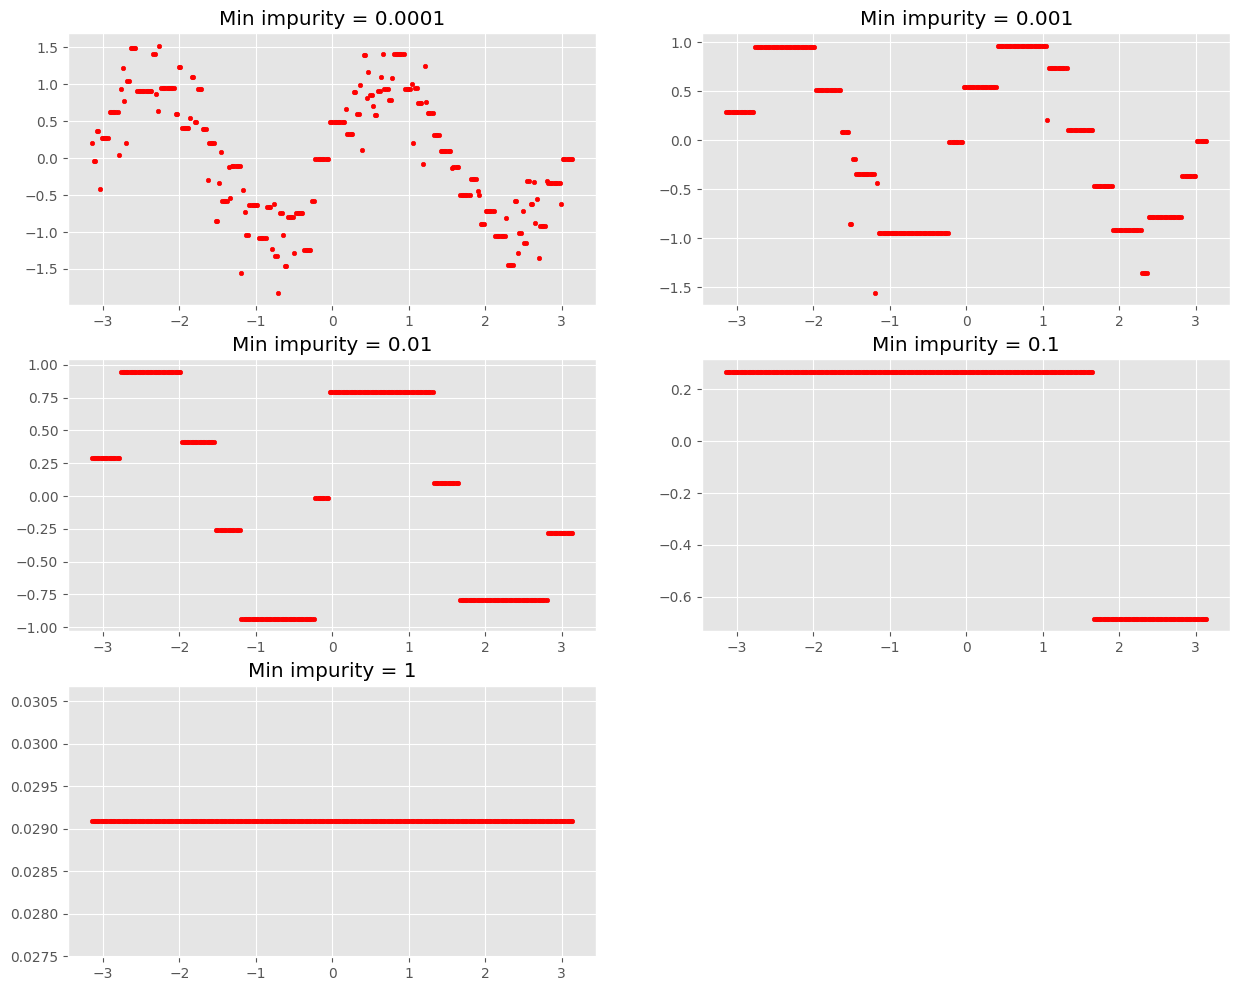

In [61]:
min_impurity_vals = [0.0001, 0.001, 0.01, 0.1, 1]
plt_ctr = 1
plt.figure(figsize=(15,12))

for val in min_impurity_vals:
    # TODO : Train a decision tree with the indicated minimum impurity val in this loop
    ### START CODE HERE ###
    dtr = DecisionTreeRegressor(min_impurity_decrease=val, random_state=42)
    dtr.fit(X_train, y_train)
    ### END CODE HERE ###

    plt.subplot(3,2,plt_ctr)

    # TODO : Predict the values of the test set we created for visualization
    #        Then, make a scatter plot with your predictions as the y-coordinate
    ### START CODE HERE ###
    predictions = dtr.predict(X_test_vis)
    plt.scatter(X_test_vis, predictions, s=10, c="red", label="Predictions")
    ### END CODE HERE ###

    plt.title("Min impurity = "+ str(val))

    plt_ctr += 1

**Sanity Check:** You should see an output with a similar pattern as minimum samples split.

**Question:** As we increase the minimum impurity, the predictions for close/nearby x values tend to get the same y-value. Why?

A: The tree stops splitting earlier which creates fewer leaves.

To **summarize:**


* Decision trees are models that partition your data one feature and one feature threshold/value at a time. This creates a tree that acts like a step-by-step "flowchart" of what to label a new test instance. It is also for this reason that decision trees are non-linear, the end result is a string of decisions across different features. Because of the visualization we get from decision trees, we can thoroughly understand why an instance labelled that way it was by following the "prediction path" the test instance made in the model.

* Decision trees are easy to overfit: it can just continue to split/branch off until each instance has its own separate leaf node. We can apply regularization methods like the ones we use above to

* Ovrefitting, as we have learned, is a sign of a high variance model. We can prevent the model from exhibiting this by applying bagging, where we create multiple overfit trees and aggregate their results.

* Bagging is an example of an ensemble method, like boosting and stacking. You can try them out using sklearn's `ensemble` library.

## <center>fin</center>


<!-- DO NOT MODIFY OR DELETE THIS -->

<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->